In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import activations, regularizers
from keras.layers import Dense, Input, Concatenate, Dropout, LSTM, Embedding, Flatten, Conv2D, MaxPooling2D, TimeDistributed
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
import numpy as np
tf.executing_eagerly()

True

In [2]:
X_train =  np.load('train_images.npy', allow_pickle=True)
y_train =  np.load('train_labels.npy', allow_pickle=True)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

This is a T-shirt/top


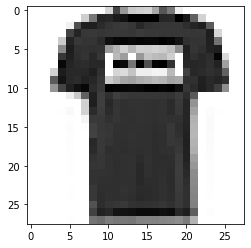

In [4]:
# show image
data_idx = 1
plt.imshow(X_train[data_idx,:,:]/255, cmap='binary')
class_number = y_train[data_idx]
class_text = class_names[class_number]
print(f'This is a {class_text}')

In [5]:
# data prep
X_train = X_train/255
X_train = X_train.reshape(-1, 28, 28, 1)
# y_train_ohe = np.zeros((68000, 10))

In [6]:
# for count, row in enumerate(y_train_ohe):
#     row[y_train[count]] = 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=101)
# y_train = y_train_ohe

In [9]:
input_layer = Input(shape=(28,28))
first_hidden_layer = LSTM(150, return_sequences=True)(input_layer)
second_hidden_layer = LSTM(100)(first_hidden_layer)
output_layer = Dense(10, activation="softmax")(second_hidden_layer)

my_model = Model(inputs=input_layer, outputs=output_layer)
my_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy") # Best optimizer = "adam", Multi-Class Classification loss allways "categorical_crossentropy"
hist = my_model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=[X_test, y_test])

Epoch 1/20
850/850 [==============================] - 50s 56ms/step - loss: 0.6044 - accuracy: 0.7745 - val_loss: 0.4517 - val_accuracy: 0.8290
Epoch 2/20
850/850 [==============================] - 48s 57ms/step - loss: 0.4298 - accuracy: 0.8419 - val_loss: 0.4284 - val_accuracy: 0.8368
Epoch 3/20
850/850 [==============================] - 46s 54ms/step - loss: 0.3768 - accuracy: 0.8603 - val_loss: 0.3761 - val_accuracy: 0.8606
Epoch 4/20
850/850 [==============================] - 48s 56ms/step - loss: 0.3442 - accuracy: 0.8733 - val_loss: 0.3429 - val_accuracy: 0.8701
Epoch 5/20
850/850 [==============================] - 47s 56ms/step - loss: 0.3253 - accuracy: 0.8797 - val_loss: 0.3311 - val_accuracy: 0.8752
Epoch 6/20
850/850 [==============================] - 46s 54ms/step - loss: 0.3037 - accuracy: 0.8863 - val_loss: 0.3080 - val_accuracy: 0.8861
Epoch 7/20
850/850 [==============================] - 47s 55ms/step - loss: 0.2870 - accuracy: 0.8936 - val_loss: 0.3040 - val_accuracy:

KeyError: 'val_loss'

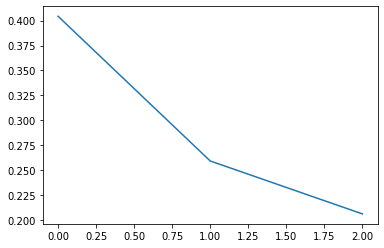

In [10]:
plt.plot(hist.history["loss"][:])
plt.plot(hist.history["val_loss"][:])

In [10]:
X_val = np.load('val_images.npy', allow_pickle=True)
X_val = X_val/255
X_val = X_val.reshape(-1,28,28,1)
prediction = my_model.predict(X_val)
print(f'Multi-Class Classification: {prediction}')
my_predictions = np.argmax(prediction, axis=1)
my_name = 'Eivind'
np.save(f'{my_name}_CNN_predictions_ver2.npy', my_predictions)

63/63 [==============================] - 0s 6ms/step
Multi-Class Classification: [[2.77382485e-03 2.36211940e-06 8.42161834e-01 ... 4.48495605e-08
  1.91595158e-04 2.36735261e-07]
 [2.53966101e-03 5.02762778e-05 1.01825101e-02 ... 4.26139366e-07
  1.30494329e-04 2.36853506e-08]
 [2.52830854e-04 1.15741543e-07 9.37042569e-06 ... 6.51153386e-01
  2.86359689e-04 3.47721070e-01]
 ...
 [4.95276880e-04 3.38821526e-04 8.89962103e-05 ... 1.59803240e-05
  4.83725831e-04 9.80262030e-06]
 [2.95111408e-06 4.81313434e-09 6.41634074e-07 ... 2.64904252e-03
  4.58768000e-06 9.97176409e-01]
 [1.18286323e-08 1.06712104e-11 9.65954872e-10 ... 1.06927214e-08
  1.61770473e-08 4.23216617e-09]]
